# IBS 574 Python Homework 3


#### Add your name and the date your notebook was last updated

In [2]:
%reload_ext watermark
%watermark -a "Mike Mortillo" -d -u -n -t -z

Mike Mortillo 
last updated: 2020-02-11 14:10:52 EST


#### Load libraries

In [23]:
import pandas as pd
import numpy as np
from sinfo import sinfo 
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import random
from matplotlib import pyplot as plt

#### Load data
note: include test for this chunk from previous homework

In [5]:
countdata = "https://raw.githubusercontent.com/jessmrandall/IBS574Spring2020/master/data/countdata.csv"
counts = pd.read_csv(countdata, index_col = 0, sep = "\t")
len(counts) == 14944

True

#### Prepare Data for PCA Analysis


In [6]:
counts_transpose = counts.T
len(counts_transpose) == 14

group = ["Control", "Control", "Control", "Control", "Control", "Control", "Control",
         "Case", "Case", "Case", "Case", "Case", "Case", "Case",]
counts_transpose["group"] = group

features = pd.Series(counts_transpose.columns)[0:14944]

feature_arr = counts_transpose.loc[:, features].values

target_arr = counts_transpose.loc[:, ['group']].values

fitted_features = StandardScaler().fit_transform(feature_arr)


#### Determine Principal Components
note: include test for this chunk from previous homework

In [7]:
random.seed(17481)
pca = PCA(n_components = 2, random_state = 17481)
principalComponents = pca.fit_transform(fitted_features)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ["PC1", "PC2"])
principalDataframe.index = counts_transpose.index
targetDataframe = counts_transpose[['group']]
newDataframe = pd.concat([principalDataframe, targetDataframe], axis = 1)

#### Graph the principal components by sample group

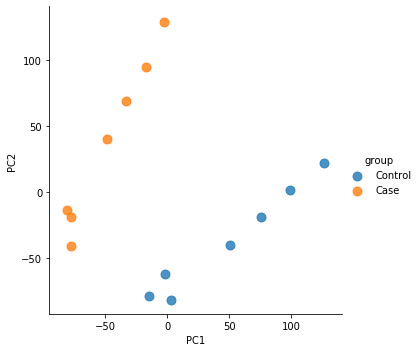

In [9]:
sns.lmplot (x = "PC1", y = "PC2", 
            data = newDataframe,
           fit_reg = False, 
           hue = "group", 
           legend = True,
           scatter_kws = {"s":80})

#### Interpret the graph for your principal investigator using the explained variance

In [11]:
pca.explained_variance_ratio_

array([0.39218002, 0.36808828])

Approximately 39% of the variability between these sample groups is explained by a sample being either a case or a control.

Approximately 37% can be attributed to another variable unaccounted for in the experimental design. 

#### Make my own plot

Text(0.5, 1, 'PCA')

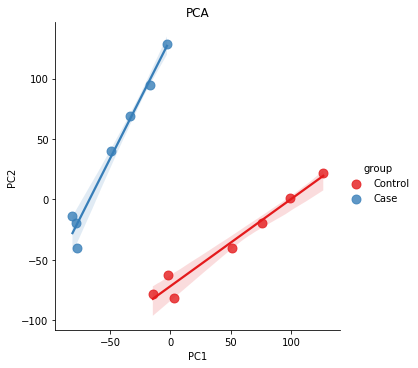

In [34]:
sns.lmplot(x='PC1', y='PC2', 
           data=newDataframe,
          fit_reg = True,
          hue = "group",
          legend = True,
           palette = "Set1",
          scatter_kws = {"s":80})
plt.title('PCA')

#### Report Session Information


In [37]:
sinfo()

-----
matplotlib  3.1.3
numpy       1.18.1
pandas      1.0.0
seaborn     0.10.0
sinfo       0.3.1
sklearn     0.22.1
-----
IPython             7.11.1
jupyter_client      5.3.4
jupyter_core        4.6.1
jupyterlab          1.1.4
notebook            6.0.3
-----
Python 3.8.1 (default, Jan  8 2020, 16:15:59) [Clang 4.0.1 (tags/RELEASE_401/final)]
macOS-10.15.2-x86_64-i386-64bit
4 logical CPU cores, i386
-----
Session information updated at 2020-02-11 15:28
